<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "survey_data_cleaned_analyzed_v2.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_PHP,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


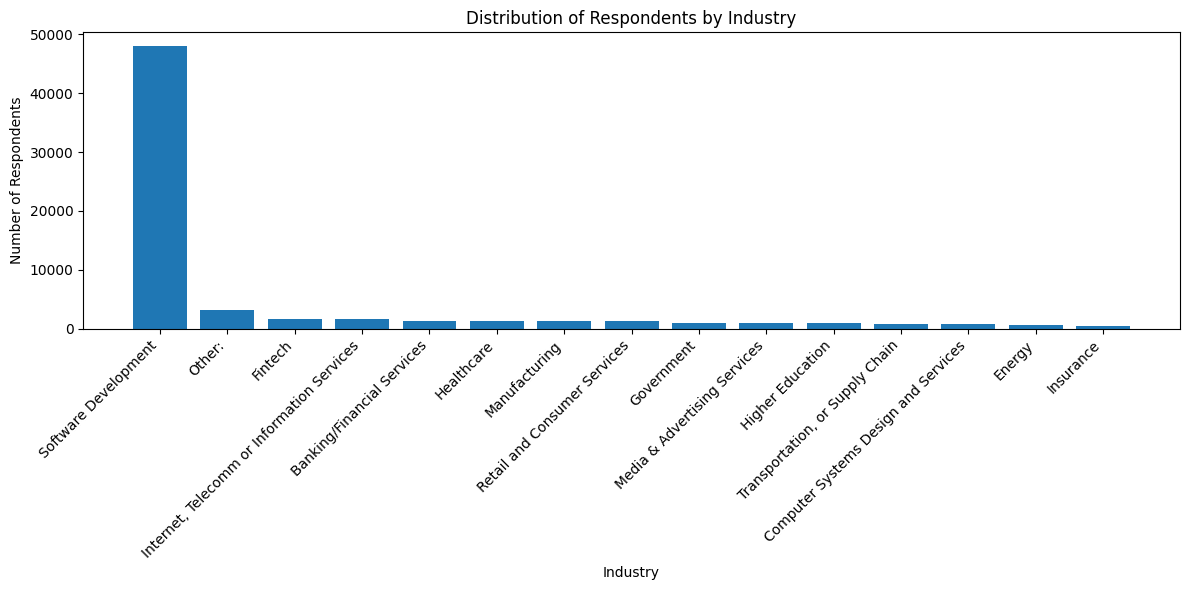

In [6]:
# Get value counts for the Industry column
industry_counts = df['Industry'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(industry_counts.index, industry_counts.values)
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [7]:
##Write your code here
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

<Axes: >

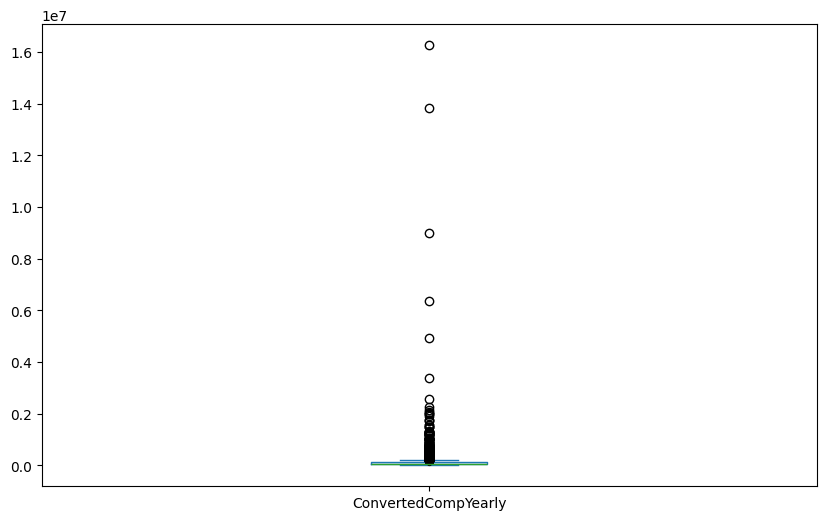

In [8]:
plt.figure(figsize=(10, 6))
df['ConvertedCompYearly'].plot(kind='box')

In [12]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
82081.0       1
47715.0       1
44123.0       1
1741.0        1
637.0         1
Name: count, Length: 6113, dtype: int64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Mean compensation: $86,155.29
Standard deviation: $186,756.97
Q1 (25th percentile): $32,712.00
Q3 (75th percentile): $107,971.50
IQR: $75,259.50
Lower bound for outliers: $-80,177.25
Upper bound for outliers: $220,860.75
Number of outliers: 978


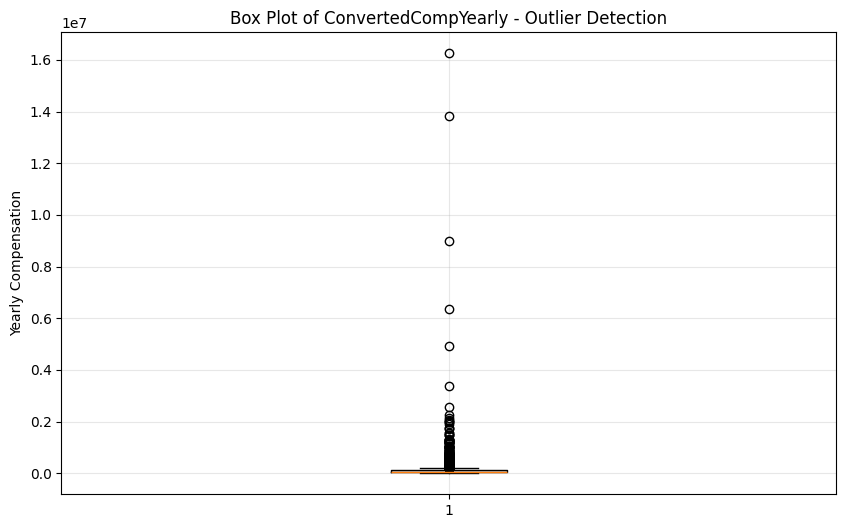

In [14]:
##Write your code here
# Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()

# Calculate IQR for outlier detection
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
outlier_count = len(outliers)

print(f"Mean compensation: ${mean_comp:,.2f}")
print(f"Standard deviation: ${std_comp:,.2f}")
print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound for outliers: ${lower_bound:,.2f}")
print(f"Upper bound for outliers: ${upper_bound:,.2f}")
print(f"Number of outliers: {outlier_count}")

# Visualize outliers using box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=True)
plt.title('Box Plot of ConvertedCompYearly - Outlier Detection')
plt.ylabel('Yearly Compensation')
plt.grid(True, alpha=0.3)
plt.show()



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [16]:
# lets drop them
df.drop(outliers.index, inplace=True)

Mean compensation: $71,347.20
Standard deviation: $51,271.40
Q1 (25th percentile): $32,000.00
Q3 (75th percentile): $101,281.00
IQR: $69,281.00
Lower bound for outliers: $-71,921.50
Upper bound for outliers: $205,202.50
Number of outliers: 245


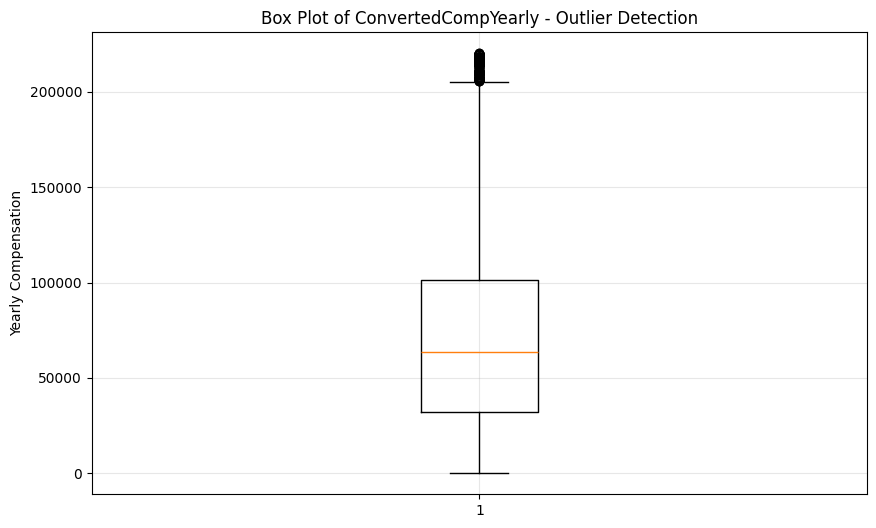

In [19]:
##Write your code here
# Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()

# Calculate IQR for outlier detection
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
outlier_count = len(outliers)

print(f"Mean compensation: ${mean_comp:,.2f}")
print(f"Standard deviation: ${std_comp:,.2f}")
print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound for outliers: ${lower_bound:,.2f}")
print(f"Upper bound for outliers: ${upper_bound:,.2f}")
print(f"Number of outliers: {outlier_count}")

# Visualize outliers using box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=True)
plt.title('Box Plot of ConvertedCompYearly - Outlier Detection')
plt.ylabel('Yearly Compensation')
plt.grid(True, alpha=0.3)
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [30]:
df[
    # 'YearsCode'
    # 'YearsCodePro'
    # 'ConvertedCompYearly'
    'JobSat'
   ].value_counts()

JobSat
7.0     41699
8.0      7336
6.0      3688
9.0      3524
10.0     2160
5.0      1922
3.0      1142
4.0      1114
2.0       756
0.0       305
1.0       267
Name: count, dtype: int64

In [27]:
# change two values of YearsCode in the df
df.loc[df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
df.loc[df['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51
df['YearsCode'].value_counts()

YearsCode
10    4501
5     3672
6     3454
8     3412
7     3299
4     3247
15    2735
20    2551
12    2500
3     2481
9     2221
14    1775
25    1611
11    1609
2     1599
13    1449
30    1407
16    1358
18    1188
17    1007
40     947
24     834
22     806
35     712
1      693
26     609
23     607
0      541
19     536
21     509
28     486
27     479
32     310
34     280
38     279
42     275
29     264
45     244
51     238
36     219
33     211
37     207
44     188
43     161
31     142
39     142
41     137
46      96
50      76
47      61
48      60
49      34
Name: count, dtype: int64

Correlations between Age and other numeric variables:
WorkExp                0.849038
YearsCodePro           0.699440
ConvertedCompYearly    0.370864
Is_Emp_retired         0.251778
Is_Emp_full_time       0.180885
Is_Emp_independent     0.109356
Is_SQL                 0.078942
WorkedWith_SQL         0.078942
Is_Ruby                0.047609
WorkedWith_Ruby        0.047609
Name: Age_numeric, dtype: float64




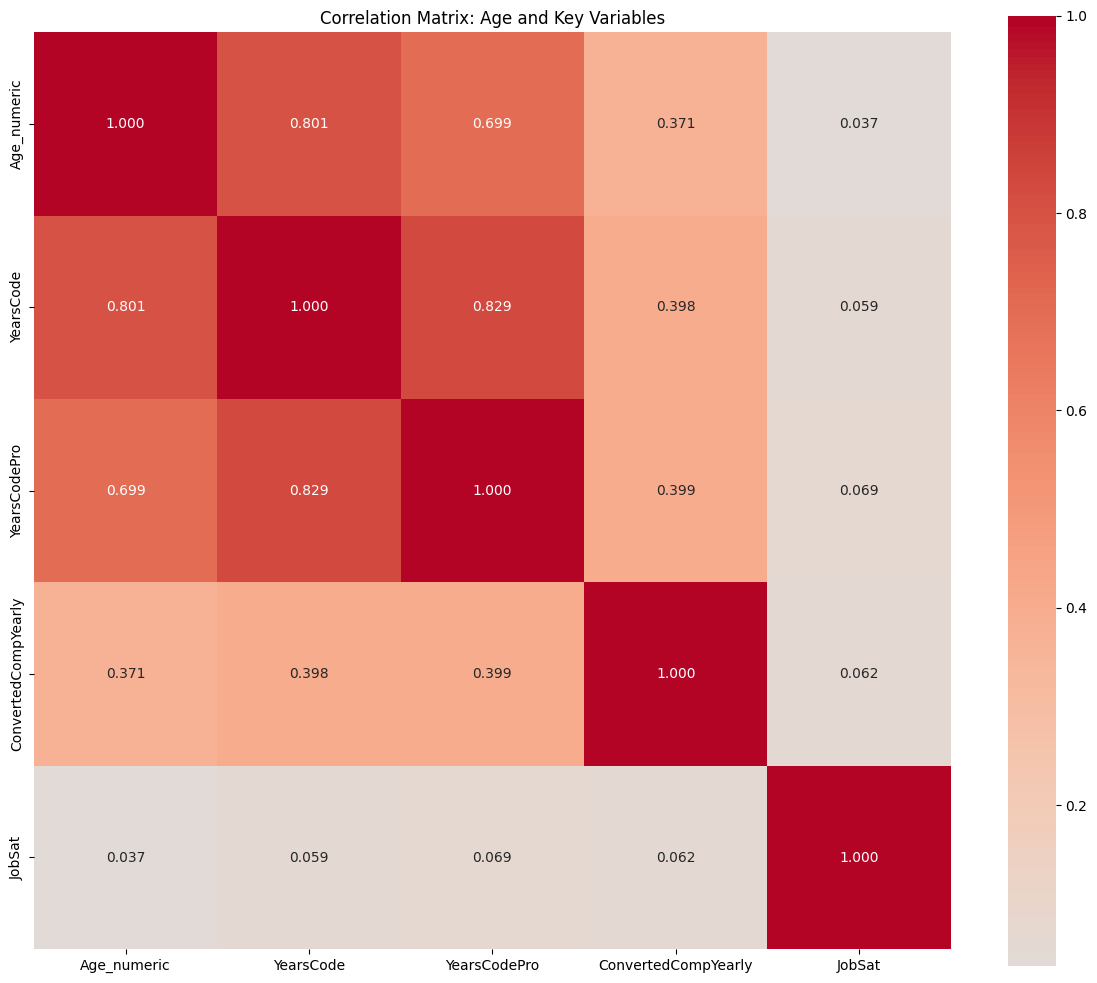

Age distribution summary:
count    63693.000000
mean        32.941571
std         11.066301
min         17.000000
25%         21.000000
50%         29.500000
75%         39.500000
max         67.000000
Name: Age_numeric, dtype: float64


In [31]:
# Map Age column to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    # 'Prefer not to say': None
}

# Create numeric age column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate correlation matrix with Age_numeric
correlation_matrix = df[numeric_columns].corr()

# Extract correlations with Age_numeric
age_correlations = correlation_matrix['Age_numeric'].drop('Age_numeric').sort_values(ascending=False)

print("Correlations between Age and other numeric variables:")
print(age_correlations.head(10))
print("\n")

# Visualize correlation matrix focusing on Age_numeric
plt.figure(figsize=(12, 10))
selected_vars = ['Age_numeric', 'YearsCode', 'YearsCodePro', 'ConvertedCompYearly', 'JobSat']
selected_corr = df[selected_vars].corr()

sns.heatmap(selected_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Age and Key Variables')
plt.tight_layout()
plt.show()

# Display summary statistics for Age_numeric
print("Age distribution summary:")
print(df['Age_numeric'].describe())




In [32]:
## Write your code here
output_filename = 'survey_data_cleaned_analyzed_v3.csv'
df.to_csv(output_filename, index=False)
print(f"Dataset saved as '{output_filename}'")

# Print summary of the final dataset
print(f"\nFinal dataset summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Missing values per column:")
print(df.isnull().sum().sum()/len(df.columns))

print(f"\nDataset successfully saved and ready for further analysis!")

Dataset saved as 'survey_data_cleaned_analyzed_v3.csv'

Final dataset summary:
Shape: (63913, 156)
Columns: 156
Missing values per column:
15189.46794871795

Dataset successfully saved and ready for further analysis!


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
